In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
carnival_visitors = pd.read_csv("carnival_visitors.csv")

In [25]:
carnival_visitors.head()

,Unnamed: 0,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,0,1,113831.0,418044.0,Finance,45,4,12,Maine,LuxurySedan,5,entertain
1,1,2,66441.0,454233.0,Tech,44,4,11,Maine,LuxurySedan,1,consume
2,2,3,160024.0,602594.0,Finance,38,2,6,Vermont,LuxurySedan,2,entertain
3,3,4,82985.0,473262.0,Govt,39,3,8,Massachusetts,LuxurySedan,4,consume
4,4,5,109369.0,527138.0,Finance,43,5,5,Massachusetts,SUV,3,entertain


In [26]:
carnival_visitors = carnival_visitors.drop('householdID',1)

In [27]:
carnival_visitors = carnival_visitors.drop('Unnamed: 0',1)

In [28]:
carnival_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   est_inc_USD     15000 non-null  float64
 1   est_netw_USD    15000 non-null  float64
 2   hhold_field     15000 non-null  object 
 3   hhold_oldest    15000 non-null  int64  
 4   hhold_pax       15000 non-null  int64  
 5   hhold_youngest  15000 non-null  int64  
 6   homeState       15000 non-null  object 
 7   hhold_car       14449 non-null  object 
 8   stream_subs     15000 non-null  int64  
 9   primary         15000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [29]:
carnival_visitors.head()

,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,113831.0,418044.0,Finance,45,4,12,Maine,LuxurySedan,5,entertain
1,66441.0,454233.0,Tech,44,4,11,Maine,LuxurySedan,1,consume
2,160024.0,602594.0,Finance,38,2,6,Vermont,LuxurySedan,2,entertain
3,82985.0,473262.0,Govt,39,3,8,Massachusetts,LuxurySedan,4,consume
4,109369.0,527138.0,Finance,43,5,5,Massachusetts,SUV,3,entertain


In [30]:
carnival_visitors.columns

Index(['est_inc_USD', 'est_netw_USD', 'hhold_field', 'hhold_oldest',
       'hhold_pax', 'hhold_youngest', 'homeState', 'hhold_car', 'stream_subs',
       'primary'],
      dtype='object')

In [31]:
carnival_visitors_withdummies = pd.get_dummies(carnival_visitors, drop_first=True, columns=['hhold_field','homeState','hhold_car','primary'])

In [32]:
carnival_visitors_withdummies.head()

,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,hhold_field_Finance,hhold_field_Govt,hhold_field_Manufacturing,hhold_field_Other,...,homeState_Ontario,homeState_Quebec,homeState_Rhode Island,homeState_US_Other,homeState_Vermont,hhold_car_LuxurySedan,hhold_car_Pickup,hhold_car_SUV,hhold_car_Sedan,primary_entertain
0,113831.0,418044.0,45,4,12,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,66441.0,454233.0,44,4,11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,160024.0,602594.0,38,2,6,2,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,82985.0,473262.0,39,3,8,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,109369.0,527138.0,43,5,5,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [33]:
carnival_visitors_withdummies.columns

Index(['est_inc_USD', 'est_netw_USD', 'hhold_oldest', 'hhold_pax',
       'hhold_youngest', 'stream_subs', 'hhold_field_Finance',
       'hhold_field_Govt', 'hhold_field_Manufacturing', 'hhold_field_Other',
       'hhold_field_Services', 'hhold_field_Tech', 'homeState_Connecticut',
       'homeState_Maine', 'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont',
       'hhold_car_LuxurySedan', 'hhold_car_Pickup', 'hhold_car_SUV',
       'hhold_car_Sedan', 'primary_entertain'],
      dtype='object')

In [34]:
X = carnival_visitors_withdummies[['est_inc_USD', 'est_netw_USD', 'hhold_oldest', 'hhold_pax',
       'hhold_youngest', 'stream_subs', 'hhold_field_Finance',
       'hhold_field_Govt', 'hhold_field_Manufacturing', 'hhold_field_Other',
       'hhold_field_Services', 'hhold_field_Tech', 'homeState_Connecticut',
       'homeState_Maine', 'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont',
       'hhold_car_LuxurySedan', 'hhold_car_Pickup', 'hhold_car_SUV',
       'hhold_car_Sedan']]
y = carnival_visitors_withdummies['primary_entertain']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
logmodel.intercept_

array([1.26302465e-11])

In [38]:
pd.DataFrame(data=logmodel.coef_.transpose(),index=X_train.columns,columns=['Coef'])

,Coef
est_inc_USD,-1.346049e-05
est_netw_USD,3.197250e-06
hhold_oldest,-9.919948e-10
hhold_pax,6.903534e-10
hhold_youngest,-1.934200e-09
stream_subs,1.593925e-10
hhold_field_Finance,-2.775465e-10
hhold_field_Govt,-2.794272e-10
hhold_field_Manufacturing,-1.152547e-11
hhold_field_Other,2.216667e-11


<i> The above data shows the coefficients from our model. These coefficients show the change in log(odds) of the response variable being a "1" for each one unit change in that predictor variable. The positive values of the coefficient will bring the log(odds) up. The negative coefficient will bring the log(odds) down. The absolute value of the coefficient tells us how strong the coefficients are.In the above data set, we have not considered units of the columns. Hence, we can say that data frame has data in multiple units such as- est_inc_USD is measured in $$ however hhold_oldest are measured in numeric.

<i> Variables which are associated with greater likelihood of "entertain" as a primary purpose of past visits are - 
hhold_car_Sedan, homeState_New York, homeState_Connecticut, hhold_pax, hhold_field_Services. These variables can influence the outcome variable since they are all associated with any form of entertainment - preference of sedan as a primary vehile, located in New York and Connecticute etc. It is interesting to note that the variable that influences 'entertain' is the one where the primary wage earner works in the Service sector.Also, it is important to note that if the hhold_pax is higher then people will most likely visit for entertainment. It may due to the fact that those houses would have kids and big family. Variables like owning an SUV, living in states that are not accessible to Lobsterland by car and having members that older in age have lesser influence on 'entertain'.

In [111]:
pred_train = logmodel.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train)

0.6086666666666667

In [112]:
pred_test = logmodel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_test)

0.607

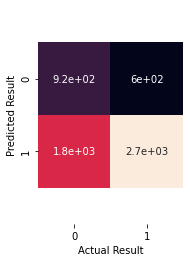

[[ 917  599]
 [1759 2725]]


In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(pred_test, y_test)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()
print(mat)

In [114]:
pred_train = logmodel.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train)

0.6086666666666667

In [115]:
pred_test = logmodel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_test)

0.607

<i> It is important to know that the model behaves in a similar manner with Test data set because we have build the model using Training data set. 

After looking at the accuracy scores of the model on Training and Test data, the model is reliable for Training data set as well as Test data set.If we see huge difference between these two values then it suggests that the model might not be good for our test data. In this case, both the values are very very close so we can say that Test data behaves pretty much same as Training set.

<h3>Why Lobster Land should care about the model? </h3>


<i> Model classifies users into the variables entertain or consume. If we get to know the probablity of that customer to renew then it makes more sense someone to take decision. The probablity data will help us to understand better about that customer in terms of renewal. 

As a Marketing Analytics team at lobster land, I would try to choose a certain probablity score (score>75%) and model prediction outcome as "1" to target some of the potential customers. I would also try to breakdown customers into the different clusters before reaching out with different version of marketing communication. For example - If I have list of customers whose associated probablity outcome is greater than 0.75 and model classify them as "1",then I will classify customers' communication separately. This may personalize the communication based on the consumer interest.

Lobster Land need to communicate folks who are willing to visit to the winter land for entertainment purpose as well as consumption purpose. When they will visit the winterland then they will spend money on food, games, entry fee and other activities. 

After, we build the model, we can generate list of predicted customer based on certain criteria and share that detail to the lobsterland. If we can tie back the prediction with the houseHold ID then lobster land should be able to reach out them via mail with a discount coupon to visit. The discount coupon could be for any activities/food stall etc. 

Similarly, based on this classification, lobsterland can save lot of money in terms of marketing by targeting right customers. </i>